In [1]:
import datetime as dt
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tw_weighted = pd.read_csv('TSEC_weighted_index.csv') # 2015/04/30 ~ 2019/04/29

In [3]:
tw_weighted.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-04-30,9841.150391,9894.900391,9820.049805,9820.049805,9820.012695,2644700.0
1,2015-05-04,9853.509766,9871.650391,9800.480469,9845.040039,9845.002930,2298800.0
2,2015-05-05,9849.129883,9855.639648,9788.129883,9820.129883,9820.092773,2134800.0
3,2015-05-06,9780.389648,9829.429688,9735.940430,9818.200195,9818.163086,2353700.0
4,2015-05-07,9789.820313,9789.820313,9704.110352,9704.110352,9704.073242,2315900.0


In [4]:
tw_weighted_adjclose_volume = tw_weighted[['Date','Adj Close','Volume']] # slice出調整後收盤價跟交易量

In [5]:
tw_weighted_adjclose_volume.head()

,Date,Adj Close,Volume
0,2015-04-30,9820.012695,2644700.0
1,2015-05-04,9845.002930,2298800.0
2,2015-05-05,9820.092773,2134800.0
3,2015-05-06,9818.163086,2353700.0
4,2015-05-07,9704.073242,2315900.0


In [6]:
sp500 = pd.read_csv('^GSPC.csv') # 2015/04/29 - 2019/04/26

In [7]:
sp500.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-04-29,2112.489990,2113.649902,2097.409912,2106.850098,2106.850098,4074970000
1,2015-04-30,2105.520020,2105.520020,2077.590088,2085.510010,2085.510010,4509680000
2,2015-05-01,2087.379883,2108.409912,2087.379883,2108.290039,2108.290039,3379390000
3,2015-05-04,2110.229980,2120.949951,2110.229980,2114.489990,2114.489990,3091580000
4,2015-05-05,2112.629883,2115.239990,2088.459961,2089.459961,2089.459961,3793950000


In [8]:
sp500_adjclose_volume = sp500[['Date','Adj Close','Volume']]

In [9]:
sp500_adjclose_volume.head()

,Date,Adj Close,Volume
0,2015-04-29,2106.850098,4074970000
1,2015-04-30,2085.510010,4509680000
2,2015-05-01,2108.290039,3379390000
3,2015-05-04,2114.489990,3091580000
4,2015-05-05,2089.459961,3793950000


In [10]:
newdf = pd.merge(tw_weighted_adjclose_volume, sp500_adjclose_volume, on='Date', how='inner')
newdf = newdf.dropna() # drop null value

In [11]:
newdf.head()

,Date,Adj Close_x,Volume_x,Adj Close_y,Volume_y
0,2015-04-30,9820.012695,2644700.0,2085.510010,4509680000
1,2015-05-04,9845.002930,2298800.0,2114.489990,3091580000
2,2015-05-05,9820.092773,2134800.0,2089.459961,3793950000
3,2015-05-06,9818.163086,2353700.0,2080.149902,3792210000
4,2015-05-07,9704.073242,2315900.0,2088.000000,3676640000


### 目標：利用S&P 500的Adj Close當label，台股大盤加權指數Adj Close當target

In [12]:
X = newdf.iloc[:, 3].values
y = newdf.iloc[:, 1].values

In [13]:
X.shape

(941,)

In [14]:
y.shape

(941,)

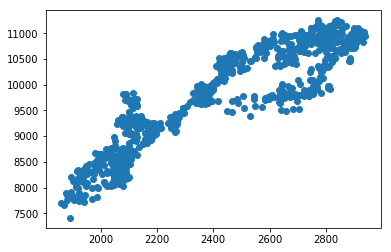

In [15]:
plt.scatter(X,y)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

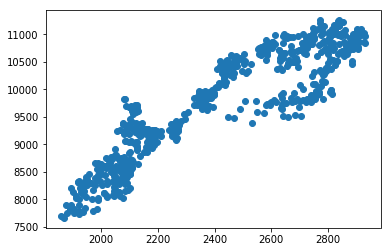

In [18]:
plt.scatter(X_train, y_train)

In [19]:
# Fitting Lineaer Regressioin to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
X_train = X_train.reshape(-1,1)
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
poly = PolynomialFeatures(degree=2)
pipeline = Pipeline(
    [('poly', poly),('lin reg', lin_reg)]
)

In [21]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('lin reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

### 利用S&P 500 polynomial (degree=2) 估計台股大盤指數

In [23]:
X_test = X_test.reshape(-1,1)
y_pred_2 = pipeline.predict(X_test)

Text(0, 0.5, 'S&P')

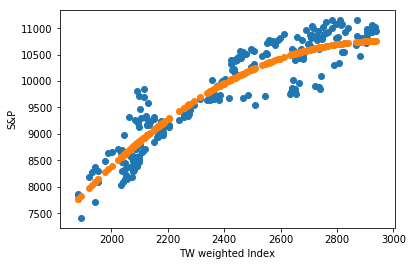

In [27]:
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred_2)
plt.xlabel('TW weighted Index')
plt.ylabel('S&P')

In [25]:
print('Prediction score:', pipeline.score(X_train, y_train))

Prediction score: 0.8604586655949543
